In [1]:
!pip install scikit-optimize

In [2]:
!wget https://raw.githubusercontent.com/bolps/dataset/master/train_breast.csv

--2020-09-15 16:52:49--  https://raw.githubusercontent.com/bolps/dataset/master/train_breast.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121917 (119K) [text/plain]
Saving to: ‘train_breast.csv.1’

train_breast.csv.1  100%[===================>] 119.06K  --.-KB/s    in 0.04s   

2020-09-15 16:52:49 (3.07 MB/s) - ‘train_breast.csv.1’ saved [121917/121917]



In [4]:
import numpy as np
import pandas as pd
import sklearn
import warnings
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.feature_selection import SelectFromModel

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv("./train_breast.csv")
dataset = dataset.drop('id',1)

In [7]:
dataset.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave.points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
0,B,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,0.1942,0.9086,1.4930,15.750,0.005298,0.015870,0.023210,0.008420,0.01853,0.002152,13.88,22.00,90.81,600.6,0.1097,0.1506,0.1764,0.08235,0.3024,0.06949
1,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,0.3645,1.4920,2.8880,29.840,0.007256,0.026780,0.020710,0.016260,0.02080,0.005304,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321
2,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,0.2720,1.0470,2.0760,23.120,0.006298,0.021720,0.026150,0.009061,0.01490,0.003599,15.05,24.75,99.17,688.6,0.1264,0.2037,0.1377,0.06845,0.2249,0.08492
3,B,14.87,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.04951,0.1487,0.05748,0.2323,1.6360,1.5960,21.840,0.005415,0.013710,0.021530,0.011830,0.01959,0.001812,16.01,28.48,103.90,783.6,0.1216,0.1388,0.1700,0.10170,0.2369,0.06599
4,B,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,0.1166,0.4957,0.7714,8.955,0.003681,0.009169,0.008732,0.005740,0.01129,0.001366,13.61,19.27,87.22,564.9,0.1292,0.2074,0.1791,0.10700,0.3110,0.07592


In [8]:
dataset.shape

(455, 31)

In [9]:
# contiamo il numero di esempi per ogni classe
counts = dataset['diagnosis'].value_counts()
n_false = counts[0]
n_true = counts[1]
print('Percentuale di tumori benigni', round(n_false / (n_false + n_true)*100, 2))
print('Percentuale di tumori maligni', round(n_true / (n_false + n_true)*100, 2))

Percentuale di tumori benigni 62.64
Percentuale di tumori maligni 37.36


In [10]:
# Visualizzo se ci sono missing
dataset.isna().sum()

diagnosis                  0
radius_mean                1
texture_mean               1
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           2
concavity_mean             0
concave.points_mean        1
symmetry_mean              1
fractal_dimension_mean     2
radius_se                  0
texture_se                 1
perimeter_se               0
area_se                    1
smoothness_se              0
compactness_se             0
concavity_se               0
concave.points_se          0
symmetry_se                1
fractal_dimension_se       0
radius_worst               2
texture_worst              0
perimeter_worst            1
area_worst                 2
smoothness_worst           0
compactness_worst          1
concavity_worst            0
concave.points_worst       0
symmetry_worst             1
fractal_dimension_worst    2
dtype: int64

In [11]:
# separiamo le feature d'ingresso x dal target y
x = dataset
y = dataset.pop('diagnosis')

# dividiamo i dati in training e test
train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
print('Train:', train_x.shape, train_y.shape)
print('Test:', test_x.shape, test_y.shape)

Train: (364, 30) (364,)
Test: (91, 30) (91,)


In [12]:
#Encoding  // B = 0, M = 1
train_y = LabelEncoder().fit_transform(train_y)
test_y = LabelEncoder().fit_transform(test_y)

In [13]:
print('Valori mancanti su train:\n',train_x.isna().sum(axis=0))
print('Valori mancanti su test:\n',test_x.isna().sum(axis=0))

Valori mancanti su train:
 radius_mean                1
texture_mean               1
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           1
concavity_mean             0
concave.points_mean        1
symmetry_mean              1
fractal_dimension_mean     1
radius_se                  0
texture_se                 1
perimeter_se               0
area_se                    1
smoothness_se              0
compactness_se             0
concavity_se               0
concave.points_se          0
symmetry_se                1
fractal_dimension_se       0
radius_worst               1
texture_worst              0
perimeter_worst            1
area_worst                 2
smoothness_worst           0
compactness_worst          1
concavity_worst            0
concave.points_worst       0
symmetry_worst             1
fractal_dimension_worst    2
dtype: int64
Valori mancanti su test:
 radius_mean                0
texture_mean               0
perime

In [14]:
#Imputazione con media

In [15]:
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp.fit(train_x)
    tmp = pd.DataFrame(imp.transform(train_x))
    tmp.columns=train_x.columns
    tmp.index=train_x.index
    train_x=tmp

    tmp = pd.DataFrame(imp.transform(test_x))
    tmp.columns = test_x.columns
    tmp.index=test_x.index
    test_x=tmp

In [16]:
print('Valori mancanti su train:\n',train_x.isna().sum(axis=0))
print('Valori mancanti su test:\n',test_x.isna().sum(axis=0))

Valori mancanti su train:
 radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave.points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave.points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave.points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Valori mancanti su test:
 radius_mean                0
texture_mean               0
perime

In [17]:
#Scaling

In [18]:
scaler = StandardScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

In [19]:
# Feature selection

In [20]:
model = XGBClassifier()
model.fit(scaled_train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

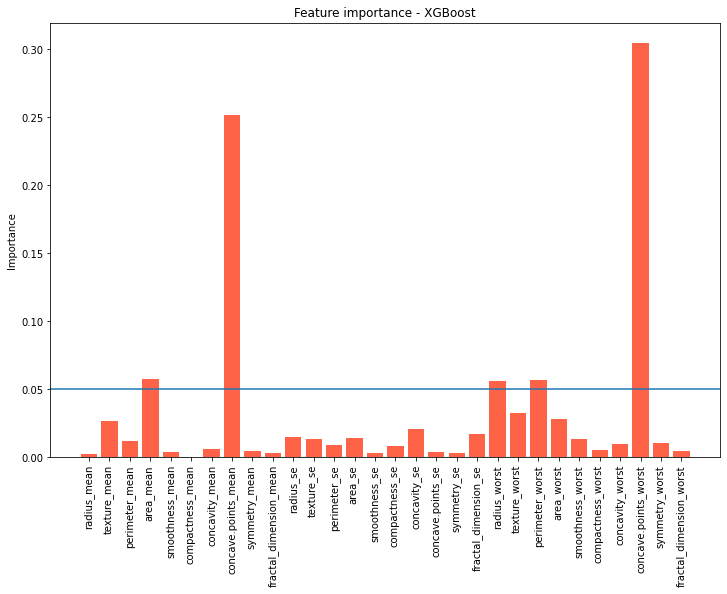

In [21]:
# Visualizzazione feature
plt.figure(figsize=(12,8))
plt.bar(x=train_x.columns.tolist(), height=model.feature_importances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Importance')
plt.title('Feature importance - XGBoost')
plt.axhline(y=0.05)
plt.show()

In [22]:
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(train_x.columns.tolist())
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Feature','Importance']

In [23]:
featureScores[featureScores['Importance']>0.05]

,Feature,Importance
3,area_mean,0.057509
7,concave.points_mean,0.251459
20,radius_worst,0.055842
22,perimeter_worst,0.056890
27,concave.points_worst,0.304556


In [24]:
selector = SelectFromModel(estimator=XGBClassifier(),threshold=0.05).fit(scaled_train_x, train_y)
selected_scaled_train_x = selector.transform(scaled_train_x)
#print(selector.estimator_.coef_)
print(selector.threshold_)

0.05


In [25]:
forest_clf = RandomForestClassifier()

search_space = {
        "bootstrap": Categorical([True, False]),
        "max_depth": Integer(1, 30),
        "min_samples_leaf": Integer(1, 20),
        "min_samples_split": Integer(2, 20),
        "n_estimators": Integer(10, 200)
    }

In [26]:
forest_bayes_search = BayesSearchCV(forest_clf, search_space, n_iter=32, scoring="accuracy", n_jobs=-1, cv=5, verbose=False)

In [27]:
forest_bayes_search.fit(selected_scaled_train_x,train_y)

BayesSearchCV(cv=5, error_score='raise',
              estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                               class_weight=None,
                                               criterion='gini', max_depth=None,
                                               max_features='auto',
                                               max_leaf_nodes=None,
                                               max_samples=None,
                                               min_impurity_decrease=0.0,
                                               min_impurity_split=None,
                                               min_samples_leaf=1,
                                               min_samples_split=2,
                                               min_weight_fraction_leaf=0.0,
                                               n_estimators=100, n_jobs=...
              search_spaces={'bootstrap': Categorical(categories=(True, False), prior=None),
      

In [28]:
forest_bayes_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
forest_bayes_search.best_score_

0.945054945054945

In [30]:
selected_test_x = selector.transform(scaled_test_x)

In [31]:
print("Performance miglior modello con k-fold: {}% (accuracy)".format(round(forest_bayes_search.best_score_*100,2)))
print("Performance miglior modello su test set: {}% (accuracy)\n".format(round(forest_bayes_search.score(selected_test_x,test_y)*100,2)))

Performance miglior modello con k-fold: 94.51% (accuracy)
Performance miglior modello su test set: 96.7% (accuracy)



In [32]:
pred_y = forest_bayes_search.predict(selected_test_x)

In [33]:
print('Matrice di confusione (test set):\n{}\n'.format(confusion_matrix(test_y, pred_y)))

Matrice di confusione (test set):
[[56  1]
 [ 2 32]]



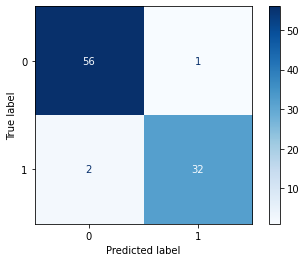

In [34]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(forest_bayes_search, selected_test_x,test_y,
                                 cmap=plt.cm.Blues)
plt.show()